# `numpy` practice

In [1]:
import numpy as np
from scipy.stats import norm

1. Do numpy exercises 6, 8, 9 and 19.

1. numpy exercise 44.

1. A snail curve is defined by the following equation in polar coordinates: $r = a + \cos\phi$. Plot the curve on an $x$-$y$ plane for several values of $a$. (Hint: `np.linspace` creates a linearly spaced array of values)

2. A *cochleoid* curve is defined by the following equation in polar coordinates: $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane. (This time, use `np.where` to work around division by zero).

3. Given two arrays, `u` and `v`, construct the Cauchy matrix using 1) explicit broadcasting, and 2) `subtract.outer` attribute.

4. See "Monte Carlo Error propagation" (separate html)

N. Rougier, *Numpy 100 excercises*, https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_no_solution.md

# Решение

# 1

6. Create a null vector of size 10 but the fifth value which is 1

In [2]:
import numpy as np

In [3]:
c = np.zeros(10)
c[4] = 1
c

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

8. Reverse a vector (first element becomes last)

In [4]:
b = c[::-1]
b

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

9. Create a 3x3 matrix with values ranging from 0 to 8

In [5]:
a = np.arange(0,9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

19. Create a 8x8 matrix and fill it with a checkerboard pattern

In [6]:
print("Checkerboard pattern:")
x = np.zeros((8,8),dtype=int)
x[1::2,::2] = 1
x[::2,1::2] = 1
print(x)

Checkerboard pattern:
[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


# 2

44. Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates

In [7]:
import cmath
d = np.linspace(1.1, 10.1, 20).reshape(10,2)
x, y = d[:,0], d[:,1]
r = np.sqrt(x**2 + y**2).reshape(10,1)
teta = np.arctan2(y, x).reshape(10,1)
e = np.concatenate((r, teta), axis=1)
e

array([[ 1.92002135,  0.96074407],
       [ 3.24767976,  0.8887156 ],
       [ 4.58240039,  0.85855726],
       [ 5.91940796,  0.84201266],
       [ 7.25743863,  0.83156656],
       [ 8.59601467,  0.82437322],
       [ 9.93491563,  0.81911851],
       [11.27402575,  0.815112  ],
       [12.61327841,  0.81195626],
       [13.95263257,  0.80940636]])

# 3

A snail curve is defined by the following equation in polar coordinates: $r = a + \cos\phi$. Plot the curve on an $x$-$y$ plane for several values of $a$. (Hint: `np.linspace` creates a linearly spaced array of values)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

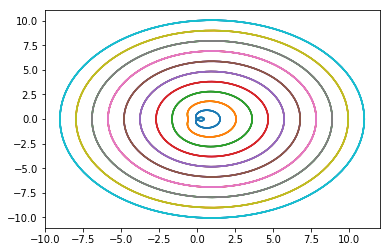

In [9]:
phi = np.linspace(-2*np.pi, 2*np.pi, 201)
a = np.linspace(-10, 10, 20)

for i in a:
    r = i + np.cos(phi)
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    plt.plot(x, y)
plt.show()

# 4

A *cochleoid* curve is defined by the following equation in polar coordinates: $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane. (This time, use `np.where` to work around division by zero).

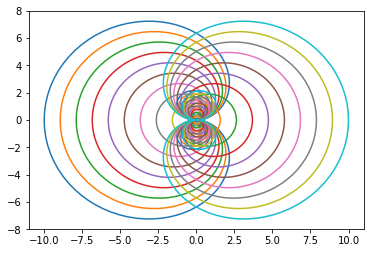

In [10]:
phi = np.linspace(-2*np.pi, 2*np.pi, 201)
a = np.linspace(-10, 10, 20)
phi = np.where(phi==0, 0.1, phi)

for i in a:
    r = i*np.sin(phi)/phi
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    plt.plot(x, y)
plt.show()


# 5

Given two arrays, `u` and `v`, construct the Cauchy matrix using 1) explicit broadcasting, and 2) `subtract.outer` attribute.

In [11]:
u = np.linspace(1,5,5)
v = np.linspace(6,10,5)

#### 1) using explicit broadcasting

In [12]:
C = np.zeros(len(u)*len(v)).reshape(len(u), len(v))

In [13]:
for i in range(len(C)):
    for j in range(len(C[i])):
        C[i,j] = 1 / (u[i] - v[j])

In [14]:
C

array([[-0.2       , -0.16666667, -0.14285714, -0.125     , -0.11111111],
       [-0.25      , -0.2       , -0.16666667, -0.14285714, -0.125     ],
       [-0.33333333, -0.25      , -0.2       , -0.16666667, -0.14285714],
       [-0.5       , -0.33333333, -0.25      , -0.2       , -0.16666667],
       [-1.        , -0.5       , -0.33333333, -0.25      , -0.2       ]])

#### 2) subtract.outer attribute

In [15]:
for i in range(len(C)):
    for j in range(len(C[i])):
        C[i,j] = 1 / np.subtract.outer(u[i], v[j])

In [16]:
C

array([[-0.2       , -0.16666667, -0.14285714, -0.125     , -0.11111111],
       [-0.25      , -0.2       , -0.16666667, -0.14285714, -0.125     ],
       [-0.33333333, -0.25      , -0.2       , -0.16666667, -0.14285714],
       [-0.5       , -0.33333333, -0.25      , -0.2       , -0.16666667],
       [-1.        , -0.5       , -0.33333333, -0.25      , -0.2       ]])

# 6

See "Monte Carlo Error propagation" (separate html)

Use the standard error propagation rules to determine the resulting force and uncertainty in your script (you can just derive the equation by hand and implement it in a single line in your code).

In [17]:
F = (6.67384 * (10**(-11)) * (40 * 10**4) * (30 * 10**4)) / (3.2**2)
F

0.7820906249999999

In [18]:
d_F = F * np.sqrt(((0.05 * 10**4 )/ (40 * 10**4) )**2 + ((0.1 * 10**4) / (30 * 10**4))**2 + (0.01 / 3.2)**2 + (0.01 / 3.2)**2)

In [19]:
d_F

0.004438311659528637

$$F = 0.782 \pm 0.004$$

Now, we can try using a Monte-Carlo technique instead. The idea behind Monte-Carlo techniques is to generate many possible solutions using random numbers and using these to look at the overall results. In the above case, you can propagate uncertainties with a Monte-Carlo method by doing the following:

randomly sample values of  M1 ,  M2 , and  r , 1000000 times, using the means and standard deviations given above

compute the gravitational force for each set of values

You should do this with Numpy arrays, and without any loops. You should then get an array of 1000000 different values for the forces.

Make a plot of the normalized histogram of these values of the force, and then overplot a Gaussian function with the mean and standard deviation derived with the standard error propagation rules. Make sure that you pick the range of x values in the plot wisely, so that the two distributions can be seen. Make sure there are also a sensible number of bins in the histogram so that you can compare the shape of the histogram and the Gaussian function. The two distributions should agree pretty well.

In [20]:
# for M1
st_d_M1 = np.random.randint(0, 0.05 * 10**4, size=1000000)
# for M2
st_d_M2 = np.random.randint(0, 0.1 * 10**4, size=1000000)
# for r
st_d_r = np.random.uniform(0, 0.01, size=1000000)

In [21]:
l_M1 = st_d_M1 + 40 * 10**4
l_M2 = st_d_M2 + 30 * 10**4
l_r = st_d_r + 3.2

In [22]:
F_l = (6.67384 * (10**(-11)) * l_M1 * l_M2) / l_r**2

/home/liza/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, 'Force')

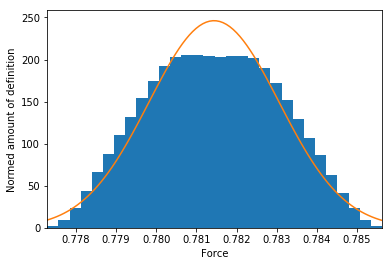

In [23]:
arr = F_l
plt.figure(1)
plt.hist(arr, normed=True, bins=30)
plt.xlim((min(arr), max(arr)))

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)
x = np.linspace(min(arr), max(arr), 100)
plt.plot(x, norm.pdf(x, mean, sigma))

plt.ylabel('Normed amount of definition')
plt.xlabel('Force')


# Part 2

In [24]:
# for M1_1
st_d_M1_1 = np.random.randint(0, 2 * 10**4, size=1000000)
# for M2_1
st_d_M2_1 = np.random.randint(0, 10 * 10**4, size=1000000)
# for r_1
st_d_r_1 = np.random.uniform(0, 1, size=1000000)

In [25]:
l_M1_1 = st_d_M1_1 + 40 * 10**4
l_M2_1 = st_d_M2_1 + 30 * 10**4
l_r_1 = st_d_r_1 + 3.2

In [26]:
F_l_1 = (6.67384 * (10**(-11)) * l_M1_1 * l_M2_1) / l_r_1**2

Text(0.5, 0, 'Force')

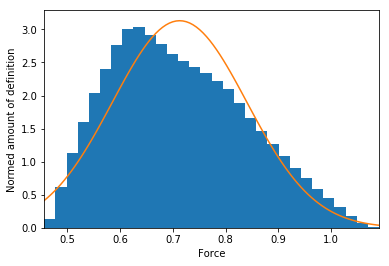

In [28]:
arr = F_l_1
plt.figure(1)
plt.hist(arr, normed=True, bins=30)
plt.xlim((min(arr), max(arr)))

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)
x = np.linspace(min(arr), max(arr), 100)
plt.plot(x, norm.pdf(x, mean, sigma))

plt.ylabel('Normed amount of definition')
plt.xlabel('Force')

In this case, which method do you think is more accurate? Why? What do you think are the advantages of using a Monte-Carlo technique?

##### В этом случае лучше использовать метод распространения стандартной ошибки, так как метод Монте-Карло в случае больших погрешностей в измеении величин дает неверный ответ. При небольших погрешностях метод Монте-Карло дает более точное значение средней величины и стандартного отклонения, а также он прост в применении.